In [3]:
import sys
from pathlib import Path

_BASE_DIR = Path().resolve().parent.parent
print("(!) Make sure this dir is project directory: ", _BASE_DIR)
sys.path.append(str(_BASE_DIR))


(!) Make sure this dir is project directory:  /home/ars/Desktop/university/bsu-nn


In [4]:
from utils.settings import get_in_out_dirs

INPUT_DIR, OUTPUT_DIR = get_in_out_dirs("lab6")

MODEL_DIR = INPUT_DIR / "model"
MODEL_DIR.mkdir(parents=True, exist_ok=True)

DATA_DIR = INPUT_DIR / "data"
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Лаб. 6.1

## Задание 1

Сохраните обученную нейронную сеть распознавания рукописных цифр.


***(!) Взять из прошлой лабы***

In [7]:
import os

json_path = MODEL_DIR / "mnist_best_model.json"
weights_path = MODEL_DIR / "mnist_best_model.weights.h5"

print("JSON exists:", os.path.exists(json_path))
print("Weights exists:", os.path.exists(weights_path))

JSON exists: True
Weights exists: True


## Задание 2

Загрузите сохранённую сеть и проверьте точность на тестовых данных.


In [8]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import model_from_json

# Загрузка модели
with open(json_path, "r") as f:
    model_json = f.read()

model = model_from_json(model_json)
model.load_weights(weights_path)

# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# Загрузка MNIST для проверки
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, 784).astype("float32") / 255
Y_test = to_categorical(y_test, 10)

# Оценка
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Точность загруженной сети на тестовых данных: {scores[1]*100:.2f}%")


2025-09-06 20:24:56.045916: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Точность загруженной сети на тестовых данных: 94.38%


## Задание 3

Используем сеть для распознавания созданной рукописной цифры `my_number.png`.


In [10]:
from tensorflow.keras.preprocessing import image
import os

my_number_path = DATA_DIR / "my_number.png"
print("My number exists:", os.path.exists(my_number_path))


My number exists: True


## Задание 4

Обучаем сверточную нейронную сеть на MNIST и используем её для распознавания собственной цифры.


***Выделил код из прошлого задания в модуль***

In [11]:
from utils.mnist import get_mnist_model

mnist_model = get_mnist_model()

(!) Either model json or model weights does not exist.
Training it now...


/home/ars/Desktop/university/bsu-nn/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 75)     │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 100)      │       187,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       800,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 995,060 (3.80 MB)

 Trainable params: 995,060 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 43s 169ms/step - accuracy: 0.9216 - loss: 0.2476 - val_accuracy: 0.9843 - val_loss: 0.0534
Epoch 2/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.9805 - loss: 0.0632 - val_accuracy: 0.9866 - val_loss: 0.0450
Epoch 3/3
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 164ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9898 - val_loss: 0.0357
Точность на тестовых данных: 99.15%
Модель и веса сохранены


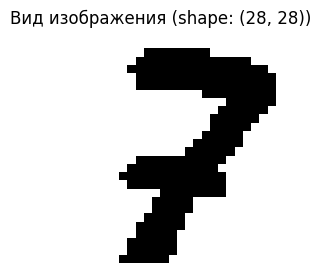

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
0: 0.0%
1: 0.0%
2: 29.0%
3: 2.0%
4: 0.0%
5: 0.0%
6: 0.0%
7: 68.0%
8: 0.0%
9: 0.0%
Предсказанный результат: 7


In [13]:
from utils.mnist import predict_mnist_image

predicted_digit = predict_mnist_image(pic_path=DATA_DIR / "7.png", 
                                      model=mnist_model,
                                      show=True)


In [14]:
from utils.mnist import CUR_MODULE_DIR

CUR_MODULE_DIR

PosixPath('/home/ars/Desktop/university/bsu-nn/data/mnist')